In [20]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import pandas as pd
matches = pd.read_csv("matches.csv", index_col=0)
matches

,team,date,time,round,day,venue,result,gf,ga,opponent,...,formation,referee,match_report,notes,sh,sot,dist,fk,pk,pkatt
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,...,4-3-3,Anthony Taylor,/en/matches/e62f6e78/Crystal-Palace-Arsenal-Au...,NaN,10,2,14.6,1,0,0
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,...,4-3-3,Darren England,/en/matches/7483b97f/Arsenal-Leicester-City-Au...,NaN,19,7,13.0,0,0,0
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,...,4-3-3,Craig Pawson,/en/matches/7f11dd9e/Bournemouth-Arsenal-Augus...,NaN,14,6,14.8,0,0,0
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,...,4-3-3,Jarred Gillett,/en/matches/8b69fd2d/Arsenal-Fulham-August-27-...,NaN,22,8,15.5,1,0,0
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,...,4-3-3,Robert Jones,/en/matches/cc235aad/Arsenal-Aston-Villa-Augus...,NaN,22,8,16.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,...,4-4-2,David Coote,/en/matches/21f920e0/Brighton-and-Hove-Albion-...,NaN,10,2,18.7,0,0,0
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,...,4-4-2,Stuart Attwell,/en/matches/217a7faf/Wolverhampton-Wanderers-A...,NaN,6,2,17.6,0,0,0
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,...,4-4-2,John Brooks,/en/matches/f5d61382/Manchester-United-Wolverh...,NaN,5,0,10.5,0,0,0
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,...,4-4-2,David Coote,/en/matches/ff2b58c3/Wolverhampton-Wanderers-E...,NaN,13,5,17.9,1,0,0


In [10]:
# matches=matches.drop('notes',axis=1)
matches=matches.iloc[:,:10]
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
# matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
# matches["day_code"] = matches["date"].dt.dayofweek
matches


,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,1,0,6
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,1,1,10
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,1,0,2
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,8
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0,0,4
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,1,1,1
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0,0,13
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,0,1,7


In [7]:
big = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\play_styles\teams5sb.csv", index_col=[0,1])
big.columns=[x.lower() for x in big.columns]
big = big.loc[2223].iloc[:,5:]
big

,ga,ga90,sota,saves,save%,w,d,l,cs,cs%,...,opp_carries,opp_totdist,opp_prgdist,opp_prgc,opp_1/3,opp_cpa,opp_mis,opp_dis,opp_rec,opp_prgr
Arsenal,43,1.13,136,94,70.6,26,6,6,14,36.8,...,10261,53986,26086,510,354,147,476,319,11310,901
Aston Villa,46,1.21,151,108,72.8,18,7,13,12,31.6,...,12332,62377,31979,607,425,184,486,320,14144,1306
Bournemouth,71,1.87,204,136,68.1,11,6,21,8,21.1,...,16186,82870,42849,810,575,211,550,362,18578,1976
Brentford,46,1.21,197,154,77.7,15,14,9,12,31.6,...,13624,72302,37380,741,656,155,547,334,15840,1530
Brighton,53,1.39,131,82,64.1,18,8,12,12,31.6,...,10293,53237,26095,527,367,173,513,350,11532,1012
Chelsea,47,1.24,159,115,71.1,11,11,16,10,26.3,...,11149,58694,30130,593,416,167,545,407,12479,1188
Crystal Palace,49,1.29,160,114,71.9,11,12,15,9,23.7,...,14512,74733,38926,590,485,139,584,409,16193,1581
Everton,57,1.50,185,127,71.9,8,12,18,9,23.7,...,14664,76078,40728,752,496,212,582,399,16932,1670
Fulham,53,1.39,196,144,76.5,15,7,16,9,23.7,...,13029,65866,32970,558,353,165,543,324,14833,1390
Leeds United,78,2.05,185,108,60.5,7,10,21,5,13.2,...,13328,67350,33950,596,423,189,630,428,14978,1455


In [11]:
matches

,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,1,0,6
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,1,1,10
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,1,0,2
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,8
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0,0,4
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,1,1,1
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0,0,13
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,0,1,7


In [14]:
full=matches.set_index('team').join(big,lsuffix='score').reset_index(drop=False,names='team')

In [15]:
full=full.set_index('opponent').join(big,rsuffix='_opo').reset_index(drop=False,names='opponent')

In [16]:
from_ranked=list(full.columns[11:])
from_ranked

['venue_code',
 'opp_code',
 'ga',
 'ga90',
 'sota',
 'saves',
 'save%',
 'w',
 'd',
 'l',
 'cs',
 'cs%',
 'gpkatt',
 'pka',
 'pksv',
 'pkm',
 'pksave%',
 'psxg',
 'psxg/sot',
 'psxg+/-',
 '/90',
 'gls',
 'sh',
 'sot',
 'sot%',
 'sh/90',
 'sot/90',
 'g/sh',
 'g/sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'xg',
 'npxg',
 'npxg/sh',
 'g-xg',
 'np:g-xg',
 'total cmp',
 'total att',
 'total cmp%',
 'total totdist',
 'total prgdist',
 'short cmp',
 'short att',
 'short cmp%',
 'medium cmp',
 'medium att',
 'medium cmp%',
 'long cmp',
 'long att',
 'long cmp%',
 'ast',
 'xag',
 'xa',
 'a-xag',
 'kp',
 'p1/3',
 'ppa',
 'crspa',
 'prgp',
 'patt',
 'plive',
 'dead',
 'pfk',
 'tb',
 'sw',
 'crs',
 'ti',
 'ck',
 'in',
 'out',
 'str',
 'cmp',
 'off',
 'blocks',
 'sca',
 'sca90',
 'sca passlive',
 'sca passdead',
 'sca to',
 'sca sh',
 'sca fld',
 'sca def',
 'gca',
 'gca90',
 'gca passlive',
 'gca passdead',
 'gca to',
 'gca sh',
 'gca fld',
 'gca def',
 'tackles tkl',
 'tackles tklw',
 'tackles def 3

In [17]:
from sklearn.model_selection import train_test_split
# predictors = ["venue_code", "opp_code", "hour", "day_code"]
X_train, X_test, y_train, y_test = train_test_split(full[from_ranked], full['target'], test_size=0.3, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [20]:
preds = rf.predict(X_test)

In [21]:

error = accuracy_score(y_test, preds)
error

0.6535087719298246

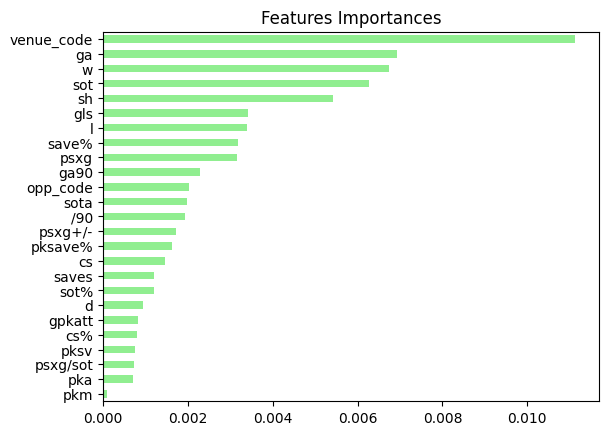

In [40]:
cols=full[from_ranked].columns
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= cols)[:25]

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [24]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict and print the label for the new data point X_new
y_pred = knn.predict(X_test)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_f

In [25]:
#  Print the accuracy
print(knn.score(X_test, y_test))

#evaluating model

# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6403508771929824
[[117  17]
 [ 65  29]]
              precision    recall  f1-score   support

           0       0.64      0.87      0.74       134
           1       0.63      0.31      0.41        94

    accuracy                           0.64       228
   macro avg       0.64      0.59      0.58       228
weighted avg       0.64      0.64      0.61       228



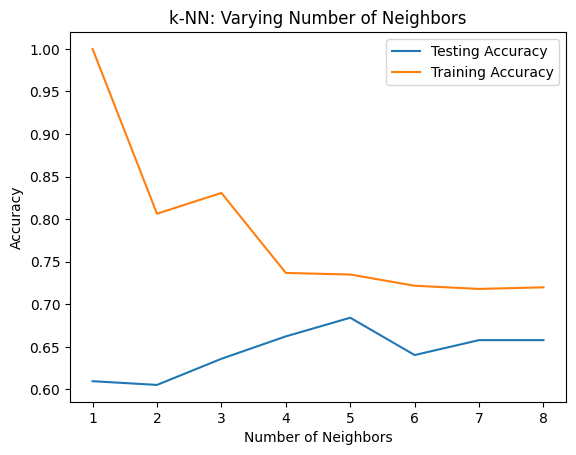

In [26]:
#how many neighbours
import numpy as np
import matplotlib.pyplot as plt
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
# Logistic Regression
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# Import the necessary modules
from sklearn.linear_model import LogisticRegression


# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
lreg = pipeline.fit(X_train, y_train)


# Compute and print metrics
print(lreg.score(X_test, y_test))

# Predict the labels of the test set: y_pred
y_pred = lreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7017543859649122
[[106  28]
 [ 40  54]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       134
           1       0.66      0.57      0.61        94

    accuracy                           0.70       228
   macro avg       0.69      0.68      0.69       228
weighted avg       0.70      0.70      0.70       228



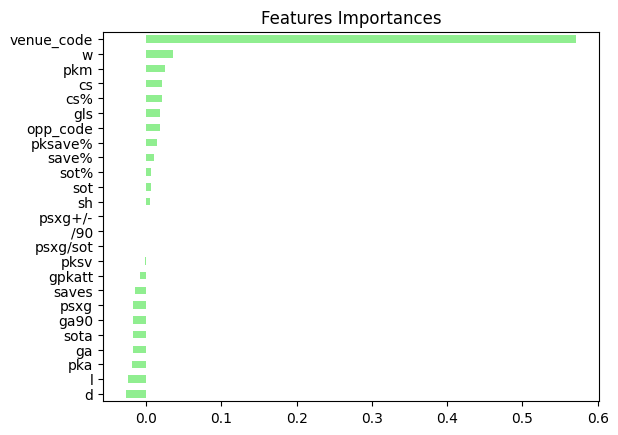

In [49]:
cols=full[from_ranked].columns
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=lreg.steps[1][1].coef_[0], index= cols)[:25]

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

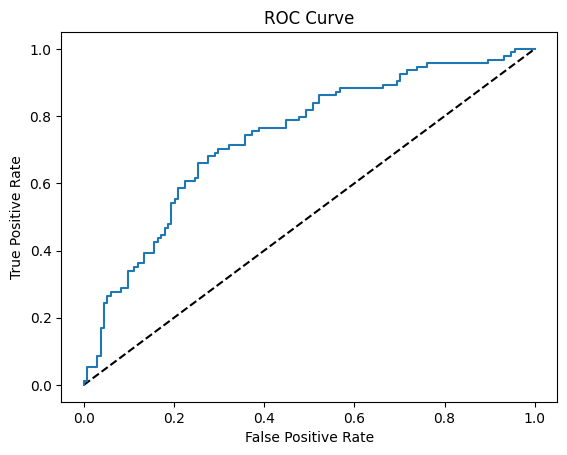

In [28]:
#ROC curve


# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [29]:
# GridSearch

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'lreg__C': c_space}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6710526315789473
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       134
           1       0.64      0.46      0.53        94

    accuracy                           0.67       228
   macro avg       0.66      0.64      0.64       228
weighted avg       0.67      0.67      0.66       228

Tuned Model Parameters: {'lreg__C': 0.0007196856730011522}


In [30]:
#CART - Classification and Regression Trees 
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1, criterion='entropy') #, criterion='gini'

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

print(classification_report(y_test, y_pred))

Test set accuracy: 0.55
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       134
           1       0.46      0.51      0.48        94

    accuracy                           0.55       228
   macro avg       0.54      0.54      0.54       228
weighted avg       0.56      0.55      0.55       228



In [31]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=2)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]



In [32]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.627


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# 50 drzew z rozna bootsrapowana data glosuje -> tworzy sie 50 tych samych modeli dopasowanych do innej kombincji danych
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, oob_score=True)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

print(classification_report(y_test, y_pred))

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.697, OOB accuracy: 0.658
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       134
           1       0.65      0.59      0.61        94

    accuracy                           0.70       228
   macro avg       0.69      0.68      0.68       228
weighted avg       0.69      0.70      0.69       228



In [34]:
from sklearn.metrics import roc_auc_score
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC score: 0.66


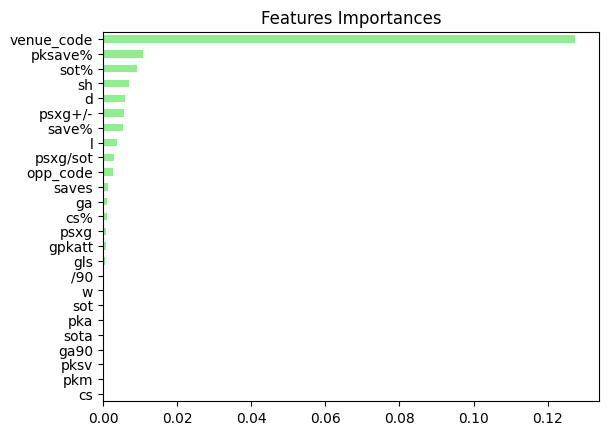

In [50]:
cols=full[from_ranked].columns
# Create a pd.Series of features importances
importances = pd.Series(data=ada.feature_importances_, index= cols)[:25]

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

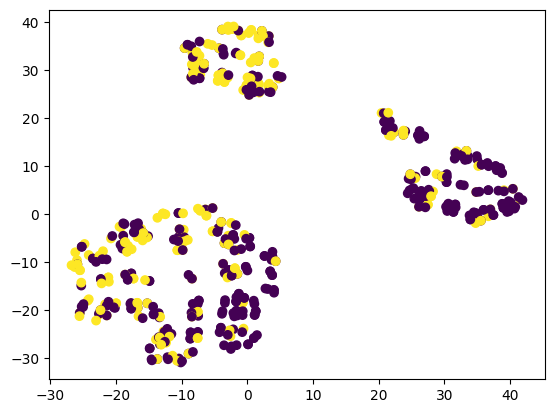

In [36]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_train)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_train)
plt.show()

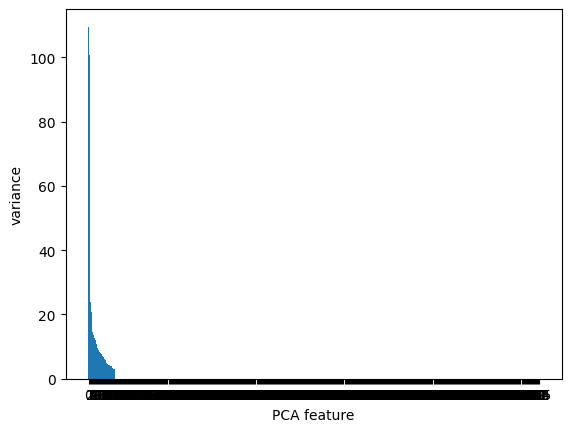

In [37]:
    # how many intrinsic dimensions

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [38]:
    # how many intrinsic dimensions you have to set n_components - idealy to intrinsic dimention

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(X_train)

# Print the shape of pca_features
print(X_train.shape)
print(pca_features.shape)

# This information is included in the pca attribute: components_. As described in the documentation, 
# pca.components_ outputs an array of [n_components, n_features], 
# so to get how components are linearly related with the different features you have to:
#wychodzi na to ze PC sa skorelowane z kazdym feature i sa ich oszacowaniem, wiec nie wiadomo z ktorego zrezygnowac

feature_names=full[from_ranked].columns
# Dump components relations with features:
pd.DataFrame(pca.components_,columns=feature_names,index = ['PC1','PC2','PC3'])


(532, 446)
(532, 3)


,venue_code,opp_code,ga,ga90,sota,saves,save%,w,d,l,...,opp_carries_opo,opp_totdist_opo,opp_prgdist_opo,opp_prgc_opo,opp_1/3_opo,opp_cpa_opo,opp_mis_opo,opp_dis_opo,opp_rec_opo,opp_prgr_opo
PC1,-0.002879,-0.013998,0.044383,0.044429,0.048779,0.035716,-0.011268,-0.049224,0.009610,0.046904,...,-0.071416,-0.071638,-0.070981,-0.065207,-0.058791,-0.052509,-0.048801,-0.051987,-0.071076,-0.074639
PC2,-0.002561,-0.007639,-0.059958,-0.060014,-0.063716,-0.045661,0.018277,0.068836,-0.015590,-0.064571,...,-0.053587,-0.052990,-0.052337,-0.048145,-0.043458,-0.037951,-0.038435,-0.041842,-0.053184,-0.055851
PC3,0.000521,-0.007938,0.047263,0.047193,-0.005286,-0.032802,-0.066766,-0.064642,0.032485,0.052155,...,0.022904,0.024556,0.022764,0.025749,0.036833,-0.010576,-0.054681,-0.053730,0.025819,0.014672


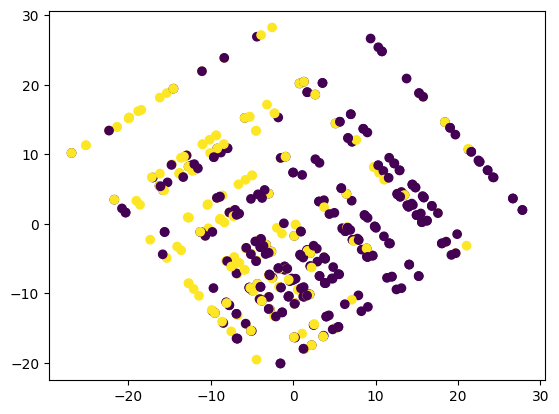

In [39]:
# Select the 0th feature: xs
xs = pca_features[:,0]

# Select the 1st feature: ys
ys = pca_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_train)
plt.show()